In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_excel(r"C:\Users\91852\Downloads\DS internship\EDA Project\data.xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

### Numerical Analysis

In [7]:
numerical = df.select_dtypes(include = ['int64', 'float64'])

In [8]:
numerical.head(20)

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000,89.92,2010,87.00,5086,2,76.32,5086,0,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,947847,300000,86.08,2010,67.50,314,2,72.98,314,1,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,912934,400000,92.00,2010,91.00,1757,1,8.58,1757,0,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,552574,600000,90.00,2009,91.20,13,1,85.03,13,1,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,1203363,230000,77.00,2010,72.20,8640,2,78.00,8640,1,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [9]:
def neg(x):
    if x<0:
        return np.nan
    else:
        return x

In [10]:
for i in numerical.columns:
    numerical[i] = numerical[i].apply(neg)

In [11]:
numerical.isna().sum()

ID                          0
Salary                      0
10percentage                0
12graduation                0
12percentage                0
CollegeID                   0
CollegeTier                 0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness        1961
agreeableness            1461
extraversion             1827
nueroticism              2270
openess_to_experience    2026
dtype: int64

In [35]:
for i in numerical.columns:
    print(i)
    print("mean=", numerical[i].mean() , "median=", numerical[i].median(), "standard deviation=", numerical[i].std())

ID
mean= 663794.5405202601 median= 639600.0 standard deviation= 363218.2458286373
Salary
mean= 307699.8499249625 median= 300000.0 standard deviation= 212737.49995685622
10percentage
mean= 77.9254427213607 median= 79.15 standard deviation= 9.850162410652574
12graduation
mean= 2008.087543771886 median= 2008.0 standard deviation= 1.6535993205715602
12percentage
mean= 74.46636568284141 median= 74.4 standard deviation= 10.999933102957721
CollegeID
mean= 5156.851425712856 median= 3879.0 standard deviation= 4802.261481733468
CollegeTier
mean= 1.9257128564282142 median= 2.0 standard deviation= 0.26227041182047633
collegeGPA
mean= 71.48617058529265 median= 71.72 standard deviation= 8.167337651961995
CollegeCityID
mean= 5156.851425712856 median= 3879.0 standard deviation= 4802.261481733468
CollegeCityTier
mean= 0.30040020010005003 median= 0.0 standard deviation= 0.45848936660999107
GraduationYear
mean= 2012.6093046523263 median= 2013.0 standard deviation= 1.3153825071394378
English
mean= 501.649

<Axes: ylabel='Density'>

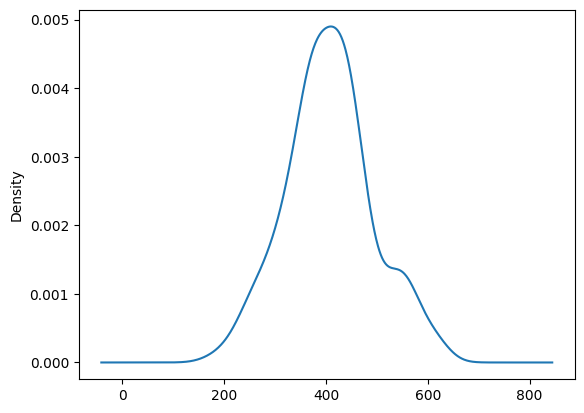

In [12]:
numerical['MechanicalEngg'].plot(kind='kde')

<Axes: ylabel='Density'>

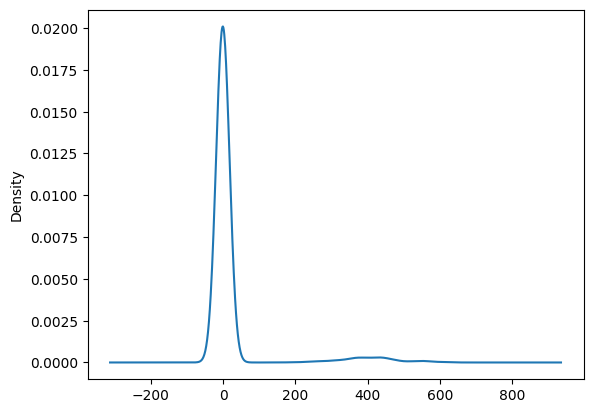

In [13]:
df['MechanicalEngg'].plot(kind='kde')

In [14]:
for i in numerical.columns:
    if 0 in numerical[i].unique():
        print(i)

CollegeCityTier
GraduationYear


In [20]:
numerical[numerical['GraduationYear']==0]

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
2664,794381,325000,89.0,2010,85.2,8346,2,68.76,8346,0,...,NaN,446.0,NaN,NaN,NaN,1.1336,0.3789,NaN,NaN,NaN


In [25]:
numerical.loc[2664,'GraduationYear']=int(numerical['GraduationYear'].median())

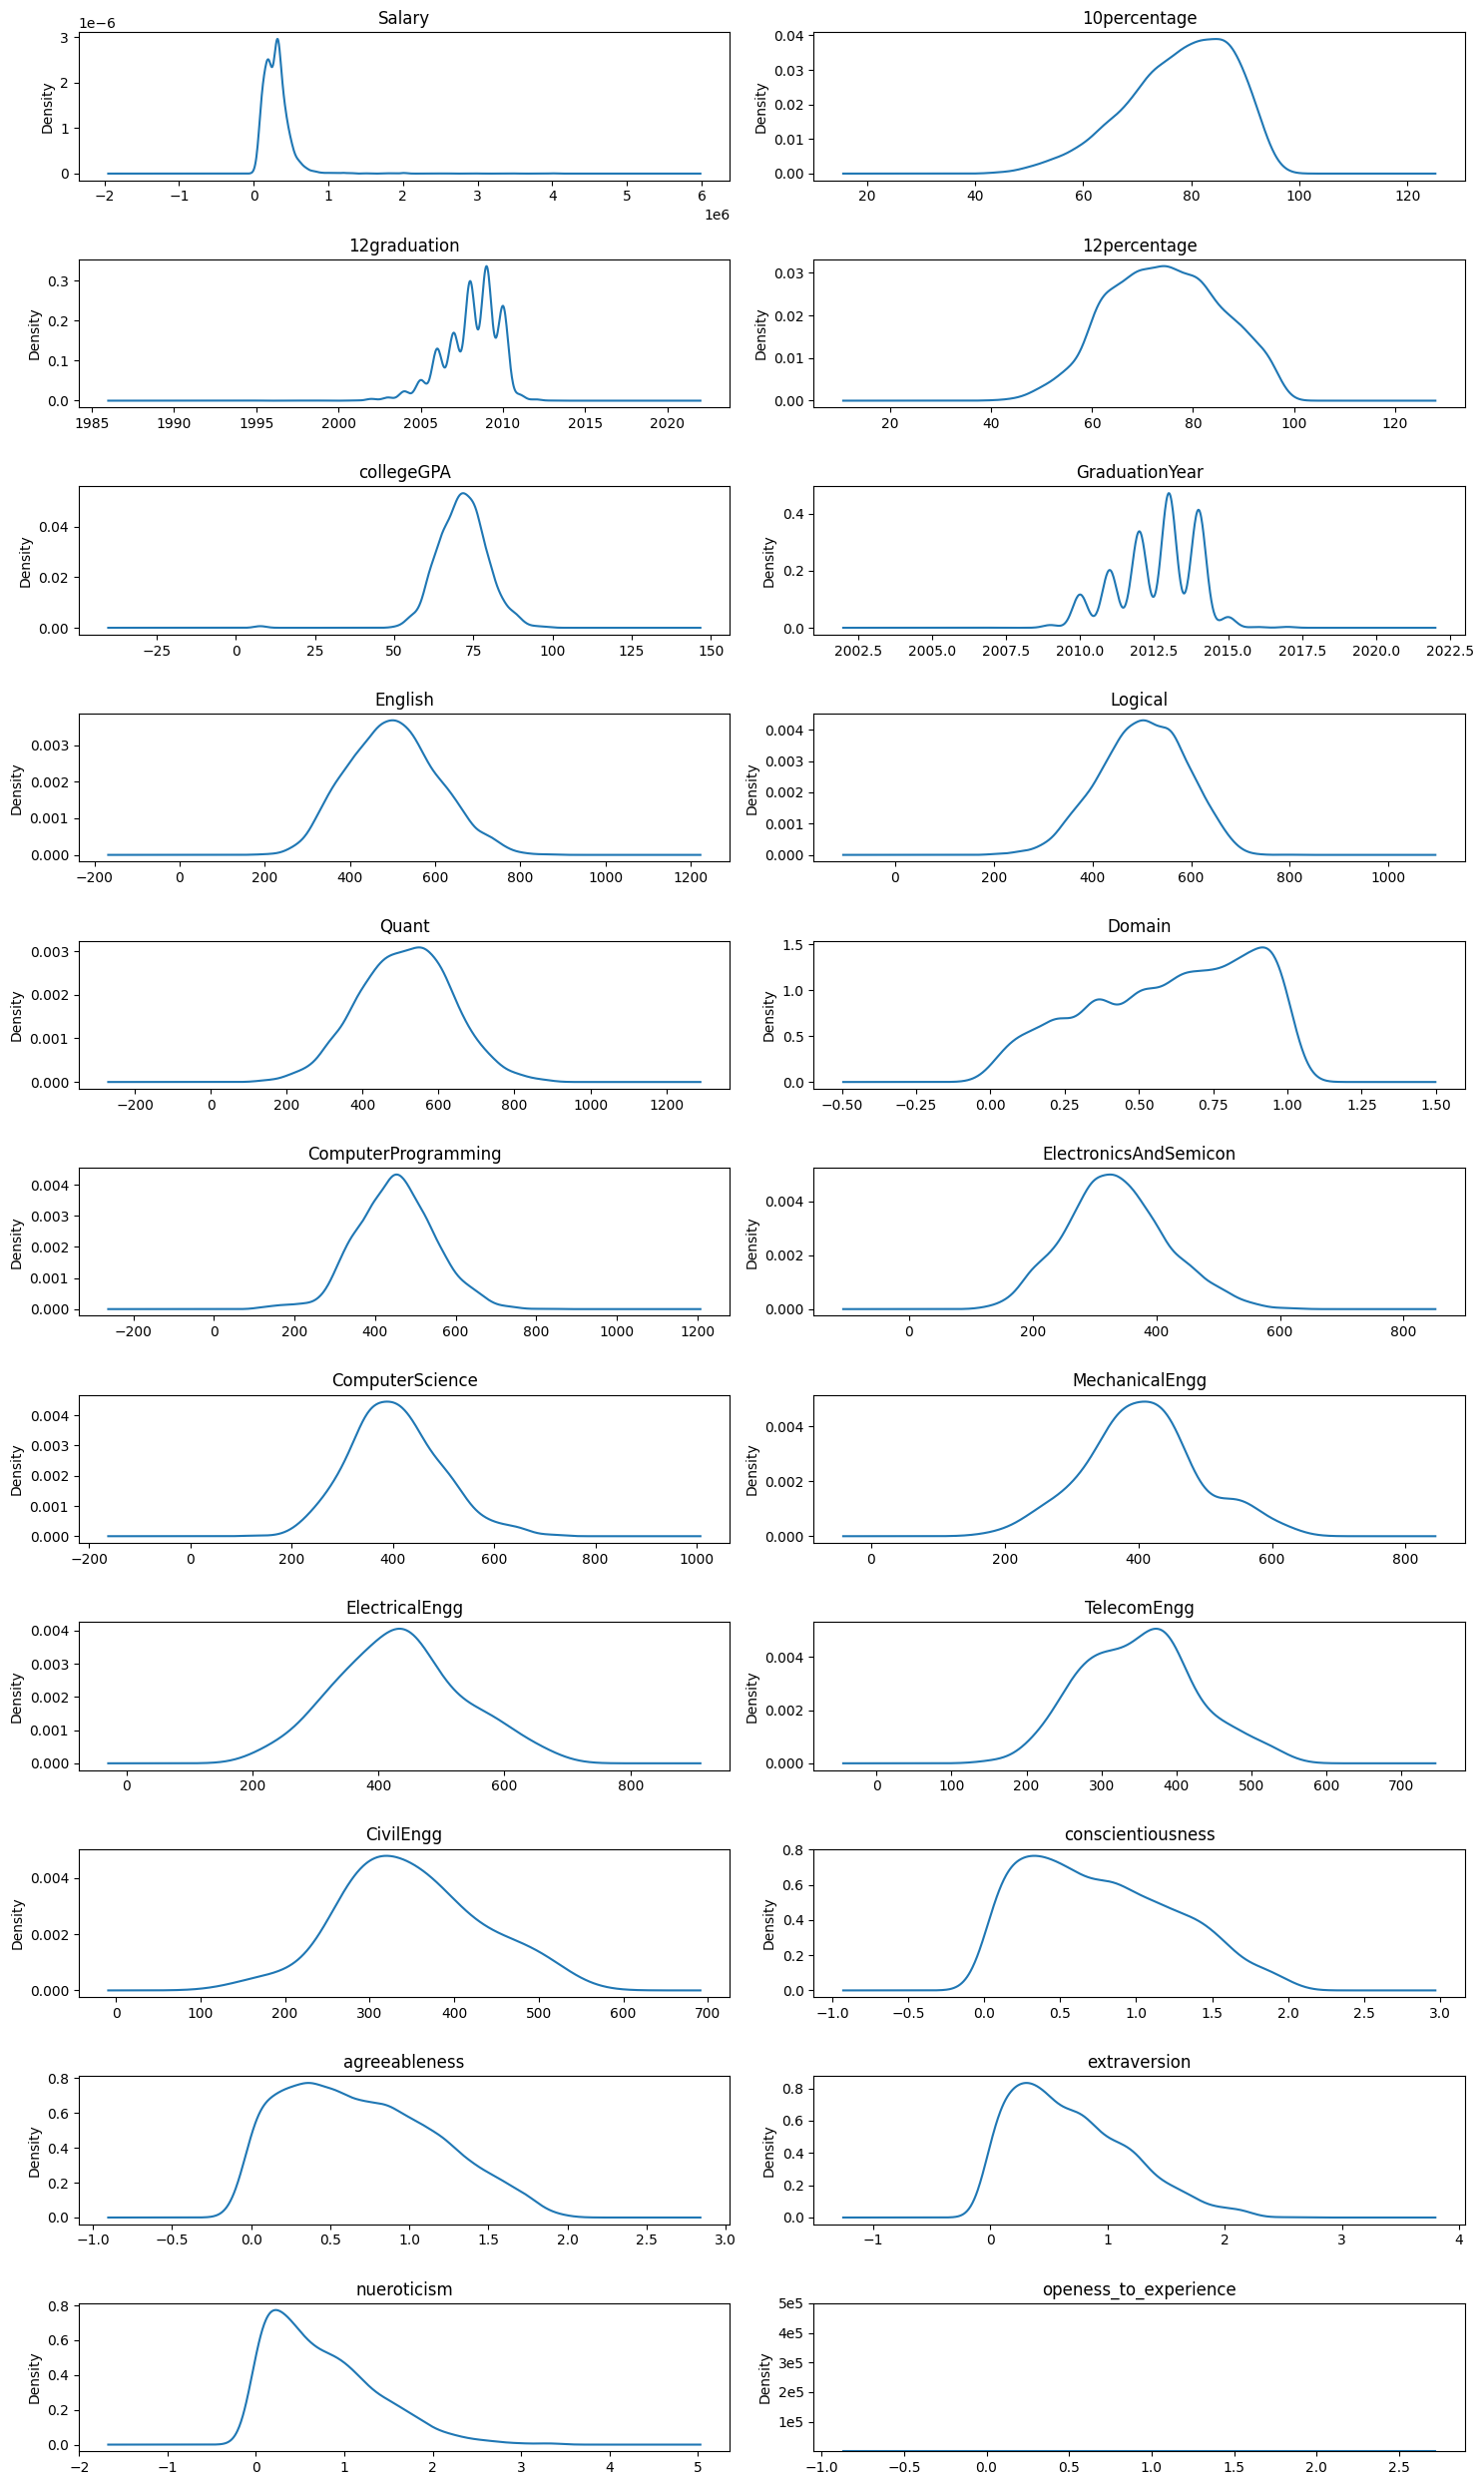

In [34]:
exclude = ['ID', 'CollegeID', 'CollegeCityID', 'CollegeTier', 'CollegeCityTier']
columns_to_plot = [col for col in numerical.columns if col not in exclude]


fig, axes = plt.subplots(11, 2, figsize=(15, 25))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    numerical[col].plot(kind='kde', ax=ax)
    ax.set_title(col)

for i in range(len(numerical.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

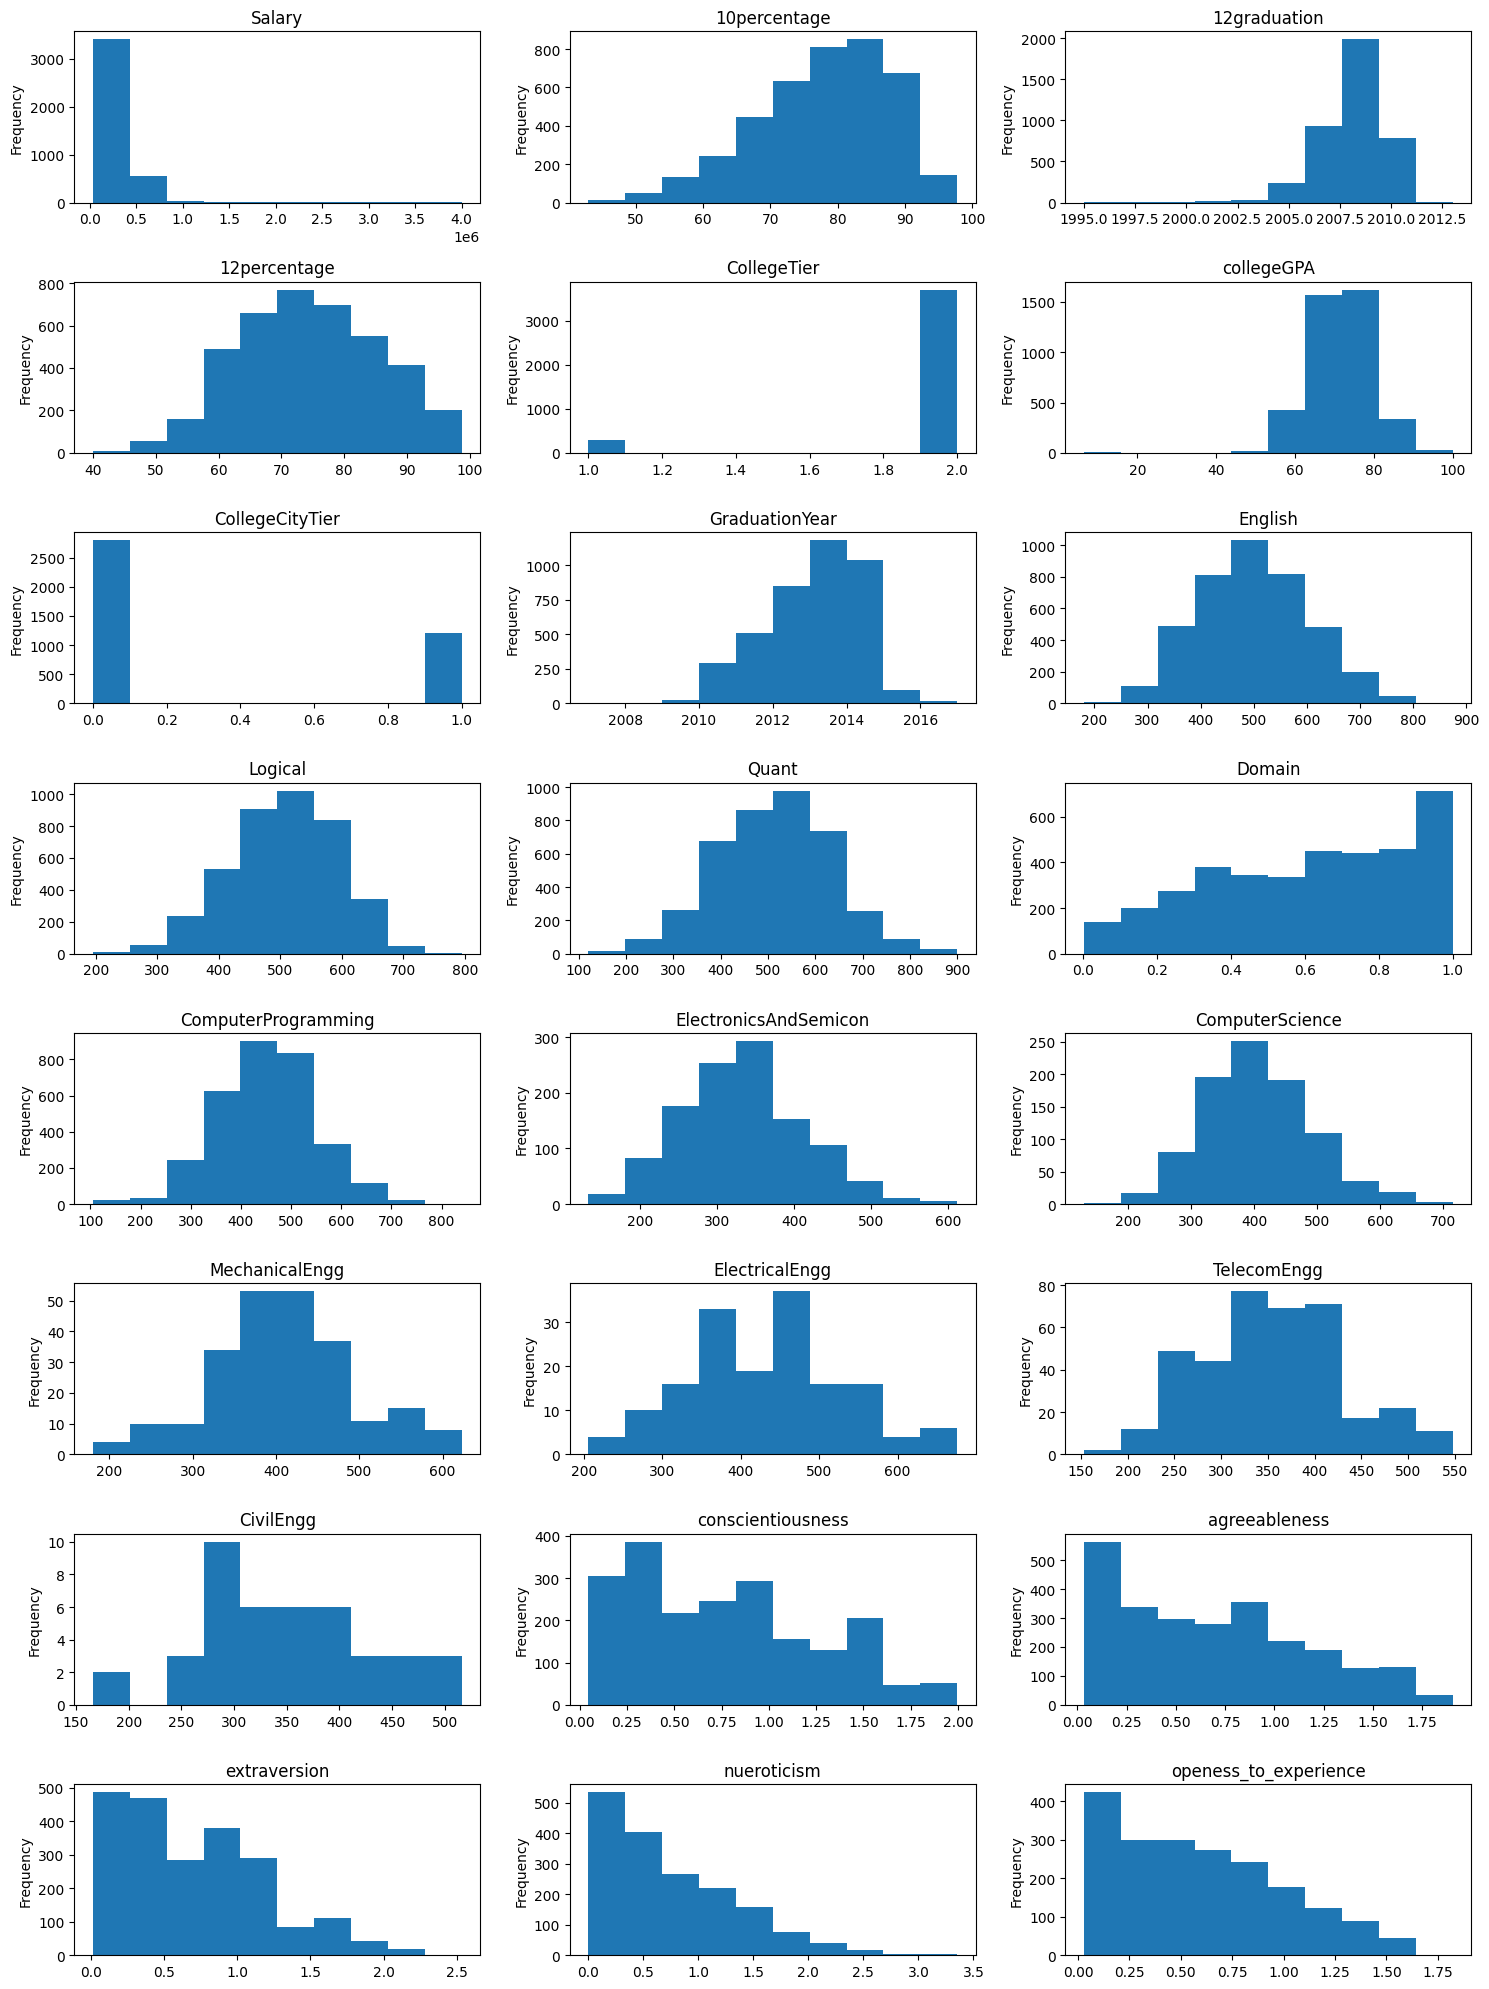

In [32]:
exclude = ['ID', 'CollegeID', 'CollegeCityID']
columns_to_plot = [col for col in numerical.columns if col not in exclude]


fig, axes = plt.subplots(8,3, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    numerical[col].plot(kind='hist', ax=ax)
    ax.set_title(col)

for i in range(len(numerical.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

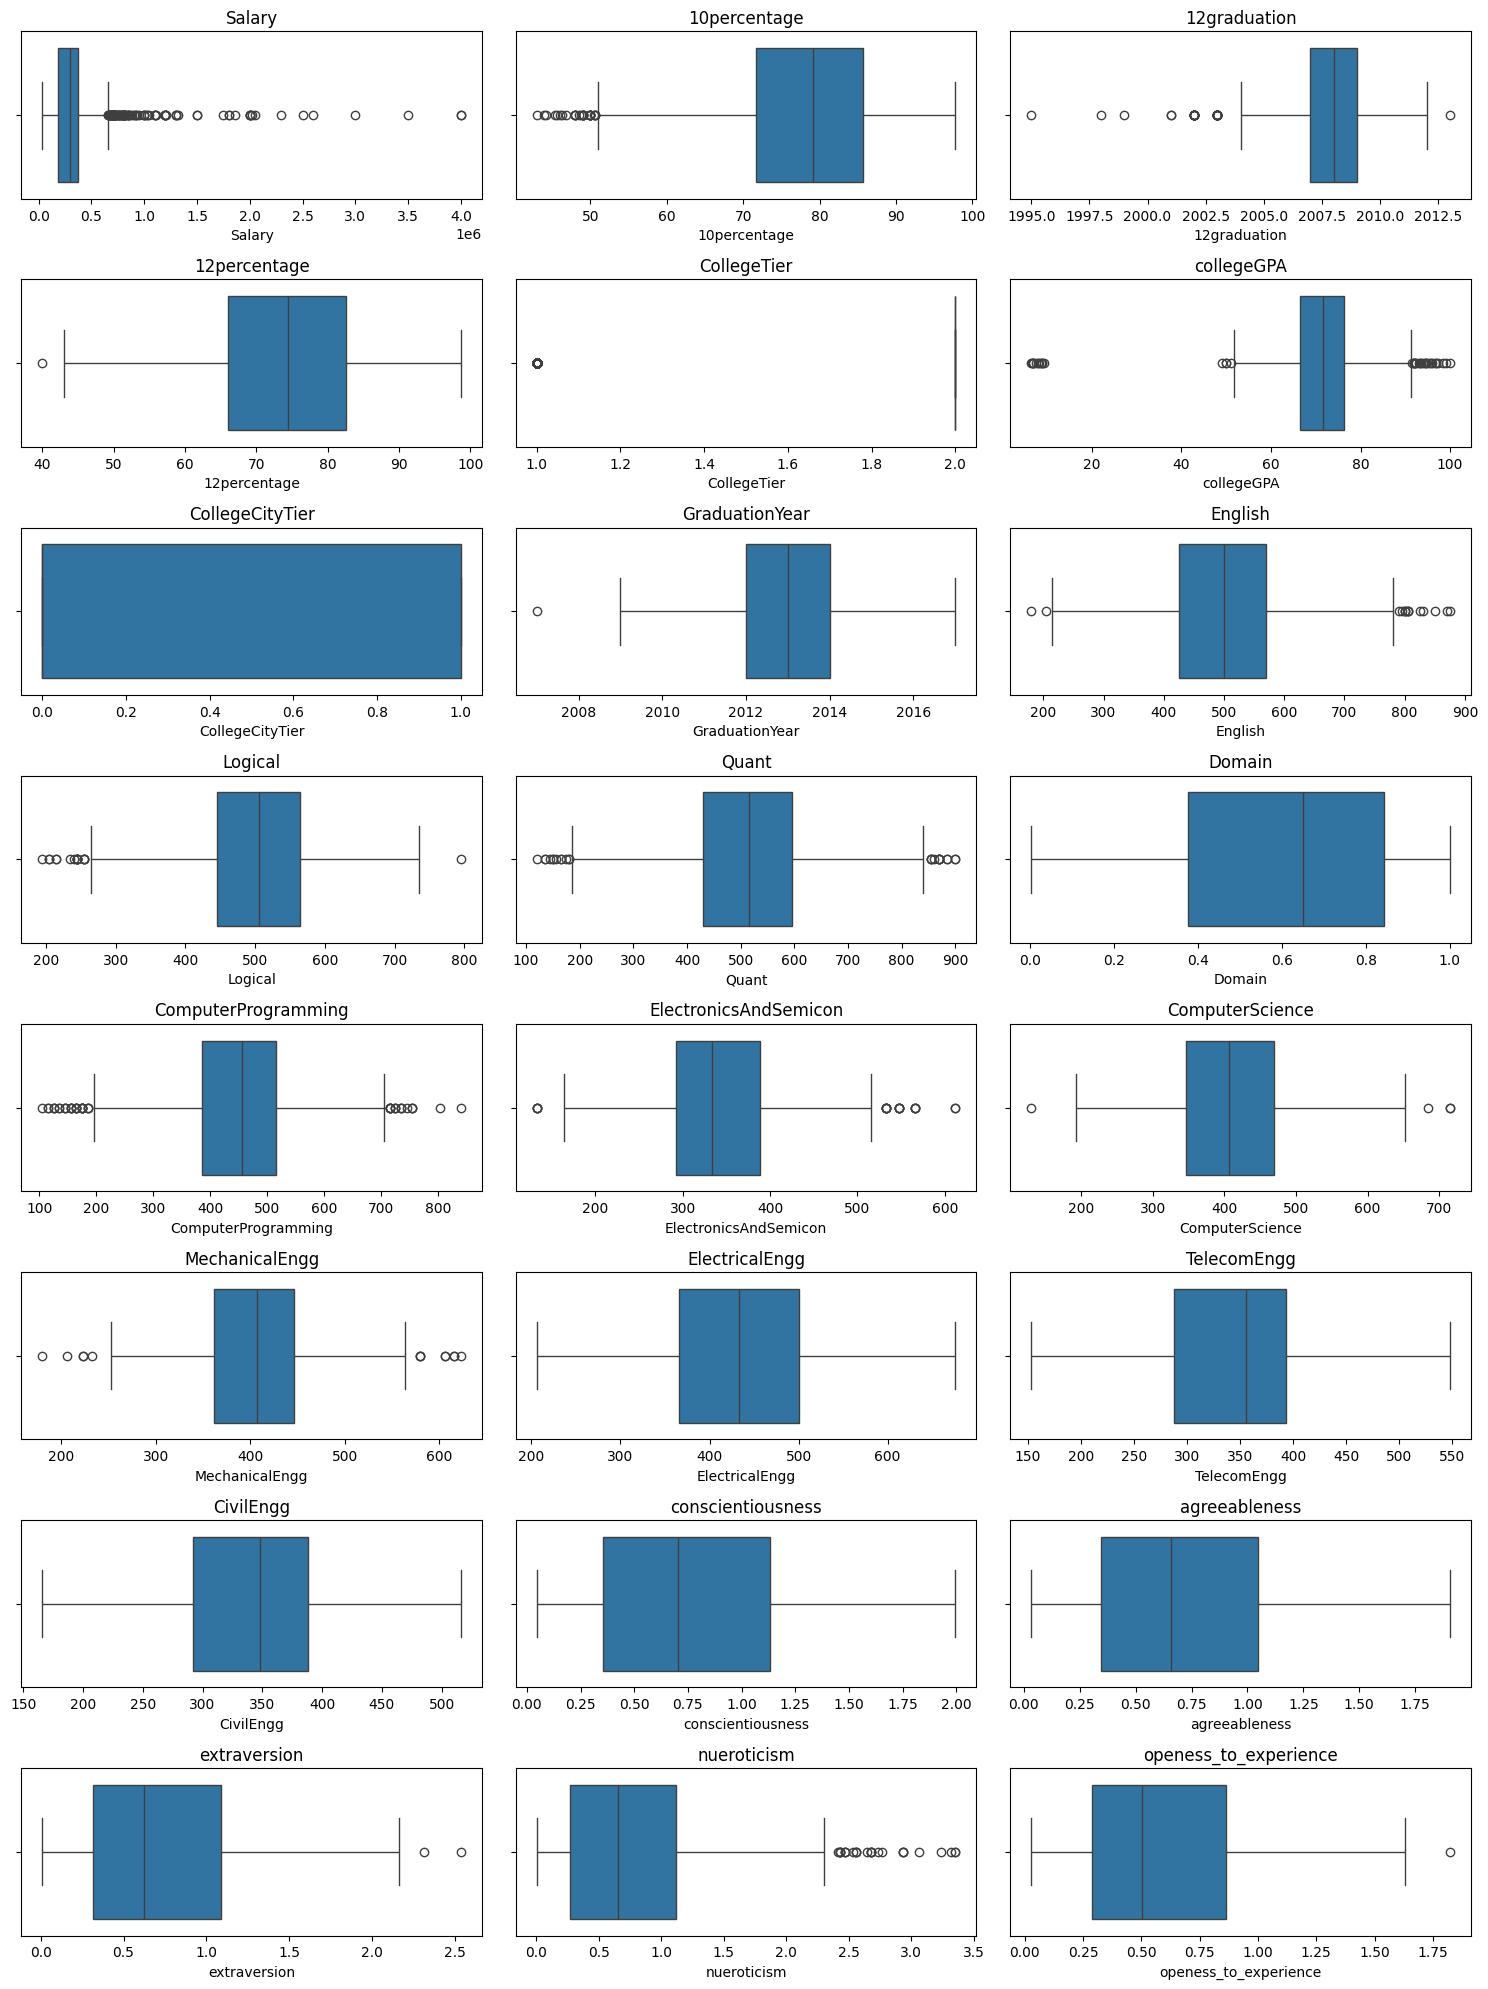

In [33]:
exclude = ['ID', 'CollegeID', 'CollegeCityID']
columns_to_plot = [col for col in numerical.columns if col not in exclude]


fig, axes = plt.subplots(8, 3, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(data=numerical, x=col, ax=ax)
    ax.set_title(col)

for i in range(len(numerical.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

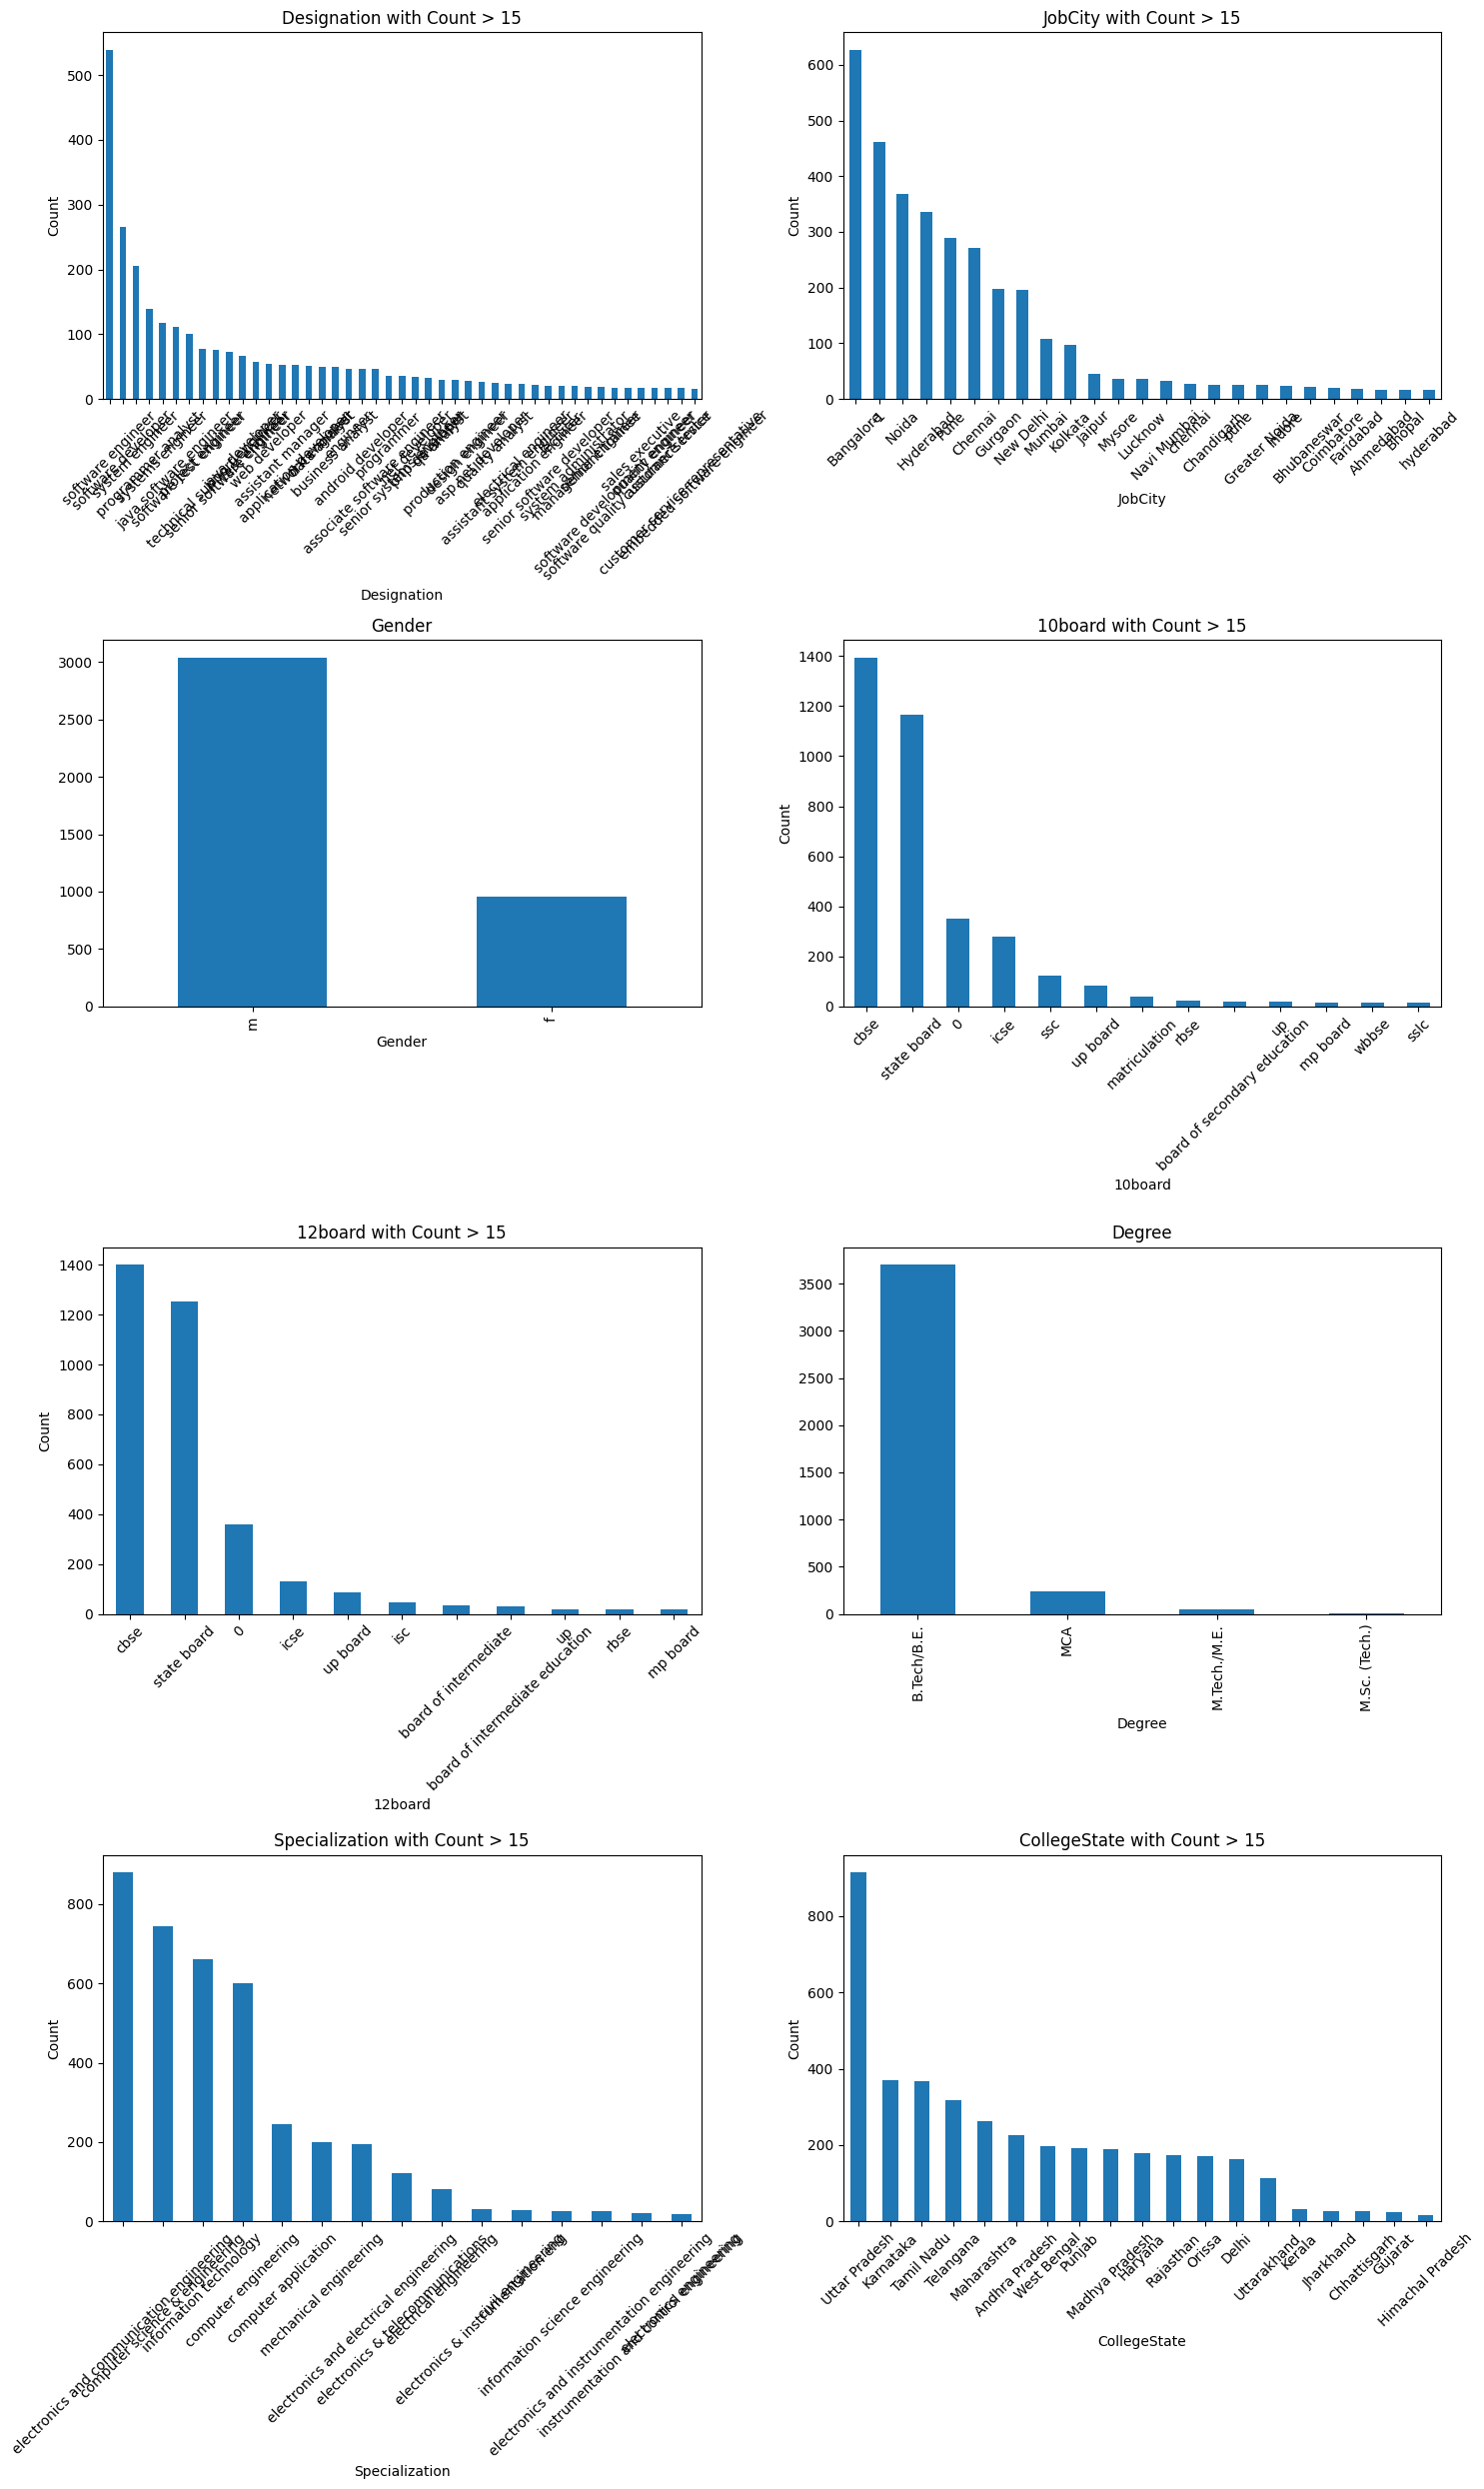

In [40]:
27+4+8

39

<Axes: xlabel='collegeGPA', ylabel='12percentage'>

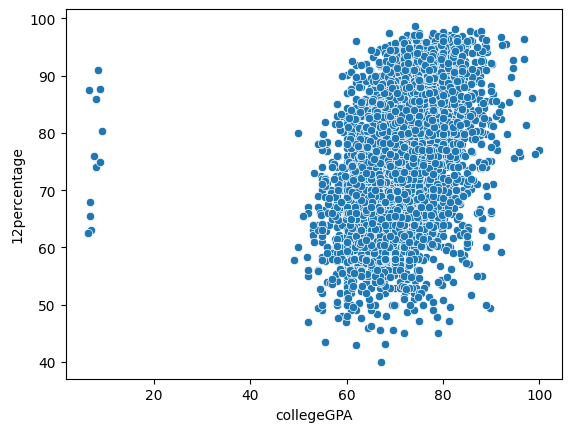

In [63]:
sns.scatterplot(data=numerical, y="12percentage", x='collegeGPA')

In [64]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   float64
 1   Salary                 3998 non-null   float64
 2   10percentage           3998 non-null   float64
 3   12graduation           3998 non-null   float64
 4   12percentage           3998 non-null   float64
 5   CollegeID              3998 non-null   float64
 6   CollegeTier            3998 non-null   float64
 7   collegeGPA             3998 non-null   float64
 8   CollegeCityID          3998 non-null   float64
 9   CollegeCityTier        3998 non-null   float64
 10  GraduationYear         3998 non-null   float64
 11  English                3998 non-null   float64
 12  Logical                3998 non-null   float64
 13  Quant                  3998 non-null   float64
 14  Domain                 3998 non-null   float64
 15  Comp

<Axes: xlabel='10percentage', ylabel='Salary'>

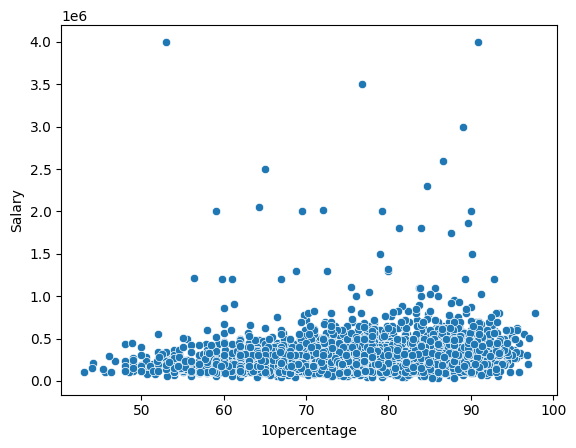

In [65]:
sns.scatterplot(data=numerical, x="10percentage", y='Salary')

<Axes: xlabel='12percentage', ylabel='Salary'>

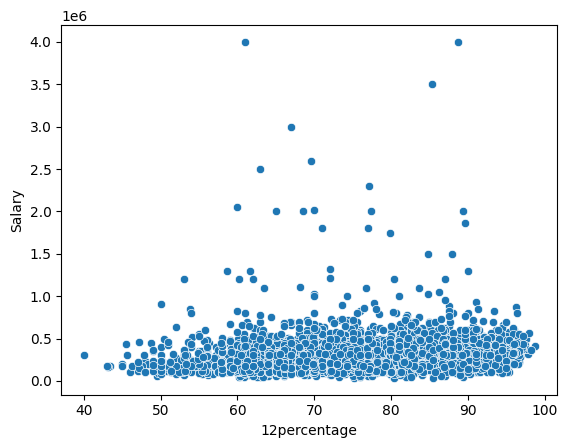

In [66]:
sns.scatterplot(data=numerical, x="12percentage", y='Salary')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

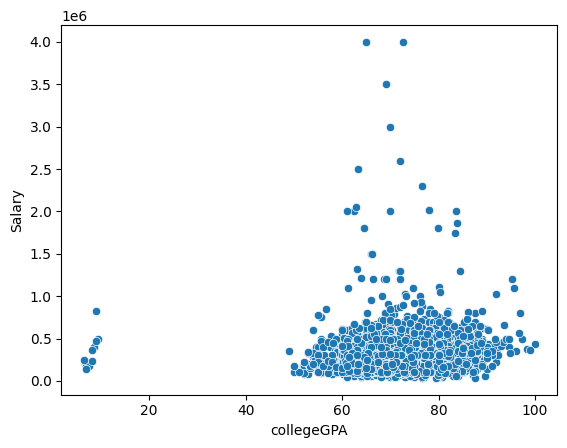

In [67]:
sns.scatterplot(data=numerical, x="collegeGPA", y='Salary')

<Axes: xlabel='Gender', ylabel='Salary'>

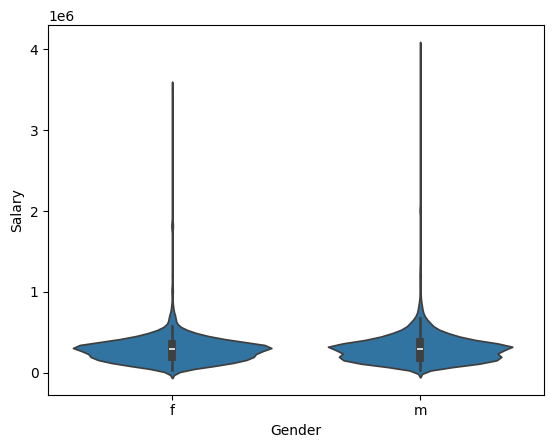

In [68]:
sns.violinplot(data=df, x='Gender', y='Salary')

<Axes: xlabel='Gender', ylabel='Salary'>

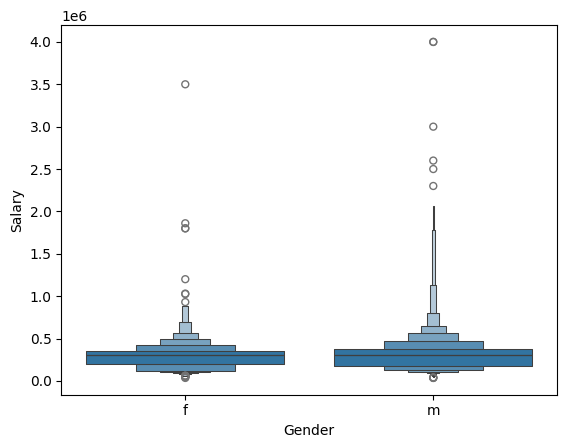

In [69]:
sns.boxenplot(data=df, x='Gender', y='Salary')

<Axes: xlabel='Degree', ylabel='Salary'>

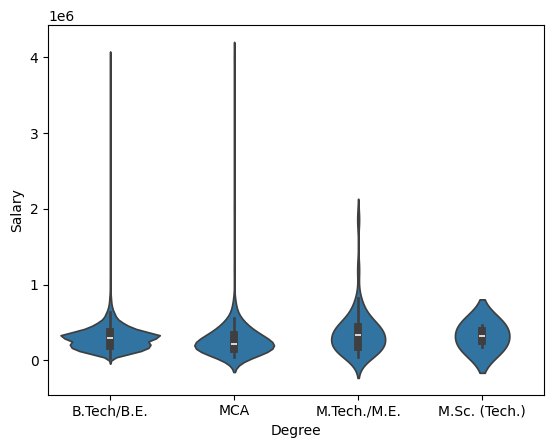

In [47]:
sns.violinplot(data=df, x='Degree', y='Salary')

Text(0.5, 1.0, 'Gender-wise group bar chart in each Degree')

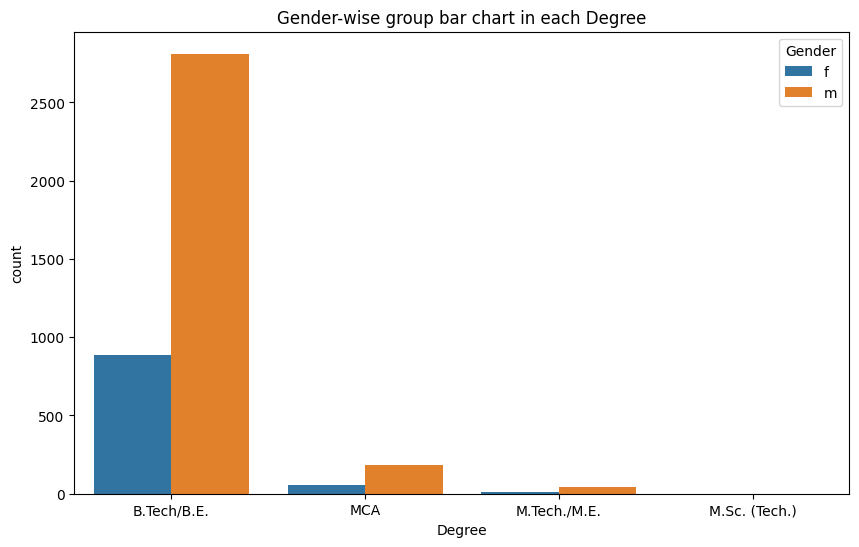

In [52]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Degree', hue='Gender', data=df)
plt.title("Gender-wise group bar chart in each Degree")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'computer engineering'),
  Text(1, 0, 'electronics and communication engineering'),
  Text(2, 0, 'information technology'),
  Text(3, 0, 'computer science & engineering'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'electronics and electrical engineering'),
  Text(6, 0, 'electronics & telecommunications'),
  Text(7, 0, 'computer application'),
  Text(8, 0, 'electrical engineering'),
  Text(9, 0, 'electronics & instrumentation eng')])

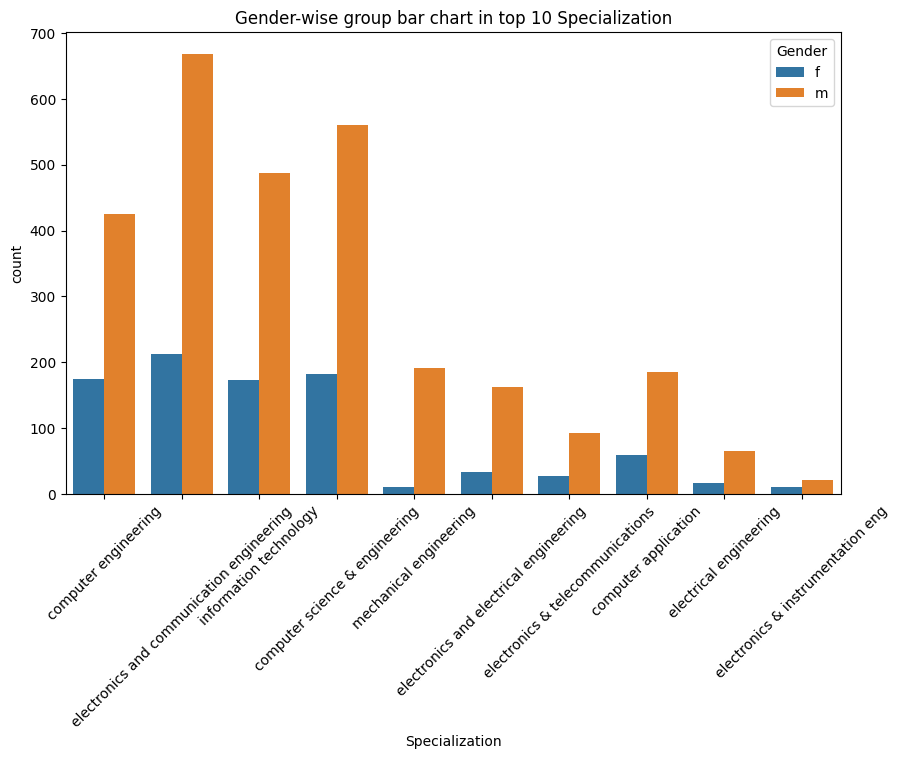

In [60]:
top_values = df['Specialization'].value_counts().head(10).index.tolist()
filtered_df = df[df['Specialization'].isin(top_values)]

plt.figure(figsize=(10, 6))

sns.countplot(x='Specialization', hue='Gender', data=filtered_df)
plt.title("Gender-wise group bar chart in top 10 Specialization")
plt.xticks(rotation=45)